In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from pprint import pprint

In [4]:
sleep_health_df = pd.read_csv('../Resources/cleaned_dataset.csv')

male_df = sleep_health_df.loc[(sleep_health_df['Gender']=='Male')]
female_df = sleep_health_df.loc[(sleep_health_df['Gender']=='Female')]

sleep_health_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Diagnosis,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Diagnosis,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Diagnosis,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


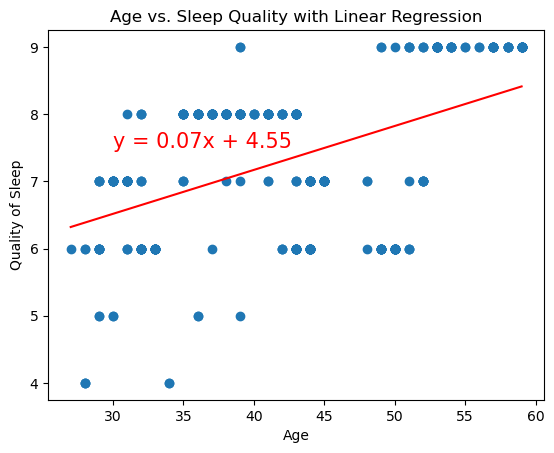

The r-squared is: 0.22442378542346403


In [7]:
from scipy.stats import linregress

x_values = sleep_health_df['Age']
y_values = sleep_health_df['Quality of Sleep']

plt.scatter(x_values, y_values)

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")

line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.annotate(line_eq,(30,7.5),fontsize=15,color="red")

plt.title('Age vs. Sleep Quality with Linear Regression')
plt.xlabel('Age')
plt.ylabel('Quality of Sleep')

plt.show()
print(f"The r-squared is: {rvalue**2}")

Male r-squared: 0.07711440670592788
Female r-squared: 0.20663535070956074
Overall r-squared: 0.22442378542346403


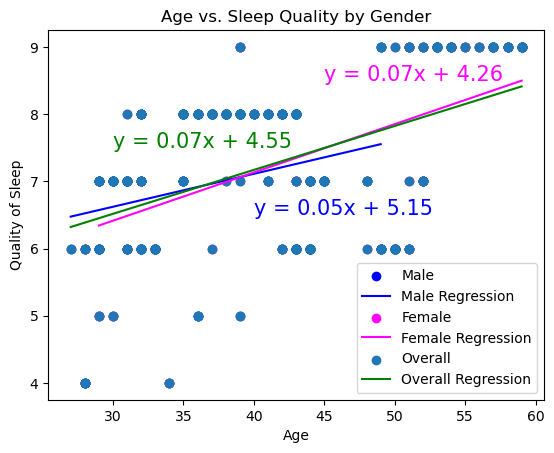

In [8]:
male_df = sleep_health_df[sleep_health_df['Gender'] == 'Male']
female_df = sleep_health_df[sleep_health_df['Gender'] == 'Female']

plt.scatter(male_df['Age'], male_df['Quality of Sleep'], label='Male', color='blue')
slope_male, intercept_male, rvalue_male, pvalue_male, stderr_male = linregress(male_df['Age'], male_df['Quality of Sleep'])
regress_values_male = male_df['Age'] * slope_male + intercept_male
plt.plot(male_df['Age'], regress_values_male, color='blue', linestyle='-', label='Male Regression')
line_eq_male = f'y = {round(slope_male, 2)}x + {round(intercept_male, 2)}'
plt.annotate(line_eq_male, (40, 6.5), fontsize=15, color="blue")

plt.scatter(female_df['Age'], female_df['Quality of Sleep'],label='Female', color='magenta')
slope_female, intercept_female, rvalue_female, pvalue_female, stderr_female = linregress(female_df['Age'], female_df['Quality of Sleep'])
regress_values_female = female_df['Age'] * slope_female + intercept_female
plt.plot(female_df['Age'], regress_values_female, color='magenta', linestyle='-', label='Female Regression')
line_eq_female = f'y = {round(slope_female, 2)}x + {round(intercept_female, 2)}'
plt.annotate(line_eq_female, (45, 8.5), fontsize=15, color="magenta")

plt.scatter(sleep_health_df['Age'], sleep_health_df['Quality of Sleep'],label='Overall')
slope_overall, intercept_overall, rvalue_overall, pvalue_overall, stderr_overall = linregress(sleep_health_df['Age'], sleep_health_df['Quality of Sleep'])
regress_values_overall = sleep_health_df['Age'] * slope_overall + intercept_overall
plt.plot(sleep_health_df['Age'], regress_values_overall, color='green', linestyle='-', label='Overall Regression')

line_eq_overall = f'y = {round(slope_overall, 2)}x + {round(intercept_overall, 2)}'
plt.annotate(line_eq_overall, (30, 7.5), fontsize=15, color="green")

plt.xlabel('Age')
plt.ylabel('Quality of Sleep')
plt.title('Age vs. Sleep Quality by Gender')

print(f"Male r-squared: {rvalue_male**2}")
print(f"Female r-squared: {rvalue_female**2}")
print(f"Overall r-squared: {rvalue_overall**2}")
plt.savefig('../images/age_vs._sleep_quality_by_gender.png')
plt.legend()
plt.show()

In [9]:
import scipy.stats as stats
def gendata():
    male_df = sleep_health_df[sleep_health_df['Gender'] == 'Male']
    female_df = sleep_health_df[sleep_health_df['Gender'] == 'Female']
    
    population1 = male_df['Quality of Sleep']
    population2 = female_df['Quality of Sleep']
    
    return population1, population2

population1, population2 = gendata()
stats.ttest_ind(population1, population2, equal_var=False)

TtestResult(statistic=-5.859317976055214, pvalue=1.078122839334259e-08, df=347.95579825488045)

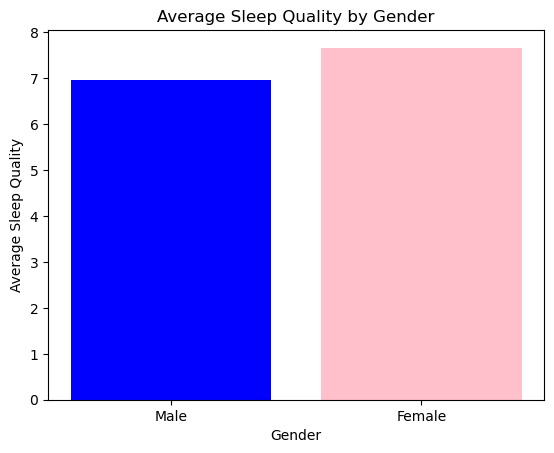

In [10]:
male_df = sleep_health_df[sleep_health_df['Gender'] == 'Male']
female_df = sleep_health_df[sleep_health_df['Gender'] == 'Female']

average_sleep_quality_male = male_df['Quality of Sleep'].mean()
average_sleep_quality_female = female_df['Quality of Sleep'].mean()

plt.bar(['Male', 'Female'], [average_sleep_quality_male, average_sleep_quality_female], color=['blue', 'pink'])
plt.title('Average Sleep Quality by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Sleep Quality')
plt.show()

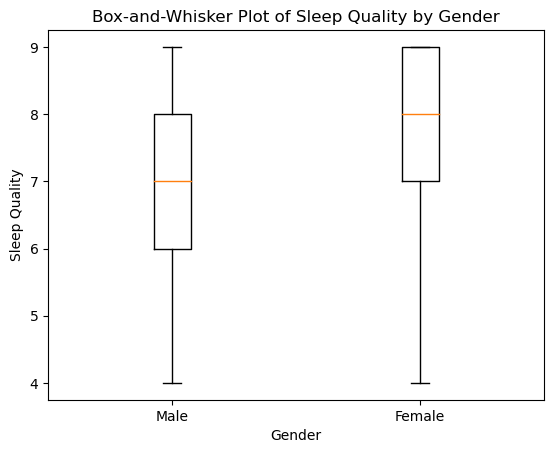

In [12]:
male_df = sleep_health_df[sleep_health_df['Gender'] == 'Male']
female_df = sleep_health_df[sleep_health_df['Gender'] == 'Female']
data_to_plot = [male_df['Quality of Sleep'], female_df['Quality of Sleep']]
plt.boxplot(data_to_plot, labels=['Male', 'Female'])
plt.title('Box-and-Whisker Plot of Sleep Quality by Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Quality')
plt.show()

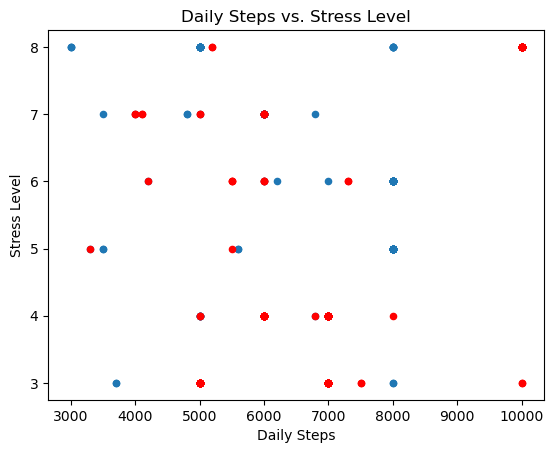

In [13]:
y_axis = 'Stress Level'
x_axis = 'Daily Steps'
plot2 = male_df.plot.scatter(x_axis, y_axis)
female_df.plot.scatter(x_axis, y_axis, color='red', ax=plot2)
plt.title(f"{x_axis} vs. {y_axis}")
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.show()

In [14]:
print(sleep_health_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
 13  Systolic                 374 non-null    int64  
 14  Diastolic                3

Male r-squared: 0.1679179343726276
Female r-squared: 0.34188141001997474
Overall r-squared: 0.03490505822417545


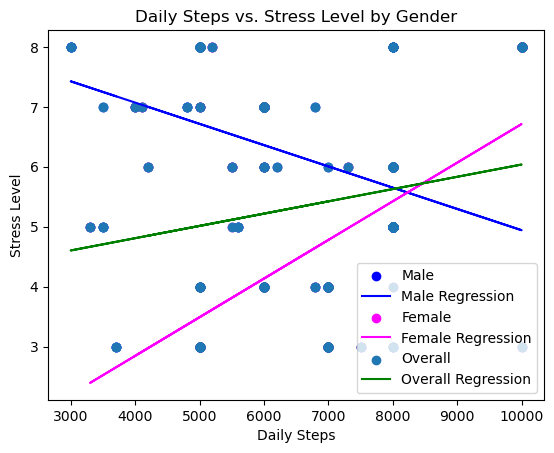

In [15]:
male_df = sleep_health_df[sleep_health_df['Gender'] == 'Male']
female_df = sleep_health_df[sleep_health_df['Gender'] == 'Female']

plt.scatter(male_df['Daily Steps'], male_df['Stress Level'], label='Male', color='blue')
slope_male, intercept_male, rvalue_male, pvalue_male, stderr_male = linregress(male_df['Daily Steps'], male_df['Stress Level'])
regress_values_male = male_df['Daily Steps'] * slope_male + intercept_male
plt.plot(male_df['Daily Steps'], regress_values_male, color='blue', linestyle='-', label='Male Regression')
line_eq_male = f'y = {round(slope_male, 2)}x + {round(intercept_male, 2)}'
plt.annotate(line_eq_male, (40, 6.5), fontsize=15, color="blue")

plt.scatter(female_df['Daily Steps'], female_df['Stress Level'],label='Female', color='magenta')
slope_female, intercept_female, rvalue_female, pvalue_female, stderr_female = linregress(female_df['Daily Steps'], female_df['Stress Level'])
regress_values_female = female_df['Daily Steps'] * slope_female + intercept_female
plt.plot(female_df['Daily Steps'], regress_values_female, color='magenta', linestyle='-', label='Female Regression')
line_eq_female = f'y = {round(slope_female, 2)}x + {round(intercept_female, 2)}'
plt.annotate(line_eq_female, (45, 8.5), fontsize=15, color="magenta")

plt.scatter(sleep_health_df['Daily Steps'], sleep_health_df['Stress Level'],label='Overall')
slope_overall, intercept_overall, rvalue_overall, pvalue_overall, stderr_overall = linregress(sleep_health_df['Daily Steps'], sleep_health_df['Stress Level'])
regress_values_overall = sleep_health_df['Daily Steps'] * slope_overall + intercept_overall
plt.plot(sleep_health_df['Daily Steps'], regress_values_overall, color='green', linestyle='-', label='Overall Regression')

line_eq_overall = f'y = {round(slope_overall, 2)}x + {round(intercept_overall, 2)}'
plt.annotate(line_eq_overall, (30, 7.5), fontsize=15, color="green")

plt.xlabel('Daily Steps')
plt.ylabel('Stress Level')
plt.title('Daily Steps vs. Stress Level by Gender')

print(f"Male r-squared: {rvalue_male**2}")
print(f"Female r-squared: {rvalue_female**2}")
print(f"Overall r-squared: {rvalue_overall**2}")
plt.savefig('../images/daily_steps_vs._stress_level_by_gender.png')
plt.legend()
plt.show()
